# PROJETO BANK MARKETING STRATEGY

## INPUT

Você foi contratado como um cientista de dados consultor, para criar um produto de dados que cria uma segmentação de clientes que direcionará a estratégia de marketing e os resultados esperados do seu trabalho de consultoria, são os seguintes:

1. Criar uma segmentação de clientes baseado em critérios claros de seleção.
2. Tornar a segmentação de clientes acessível para o time de operações.
3. Ensinar o time de operações sobre como usar a sua solução.
4. Transferir o conhecimento para os Cientistas de Dados da International Bank.
5. Recomendar 2-3 alavancas de negócio para cada segmento de clientes.

## OUTPUT

Painel de PowerBI

## TASKS

Descrição dos dados
- Substituição de NA's

EDA
- Análise Univariada 
- Análise Bivariada
- Detecação de outliers
- Seleção de Features
- Estudo do EspaçoDefinição do Embedding

Treinamento dos algoritmos de ML.
- Análise de Performance
- Análise de Clustering
- Definição dos número de clustering.

Insights
- Explicação das características dos segmentos


Arquitetura da AWS.
- S3 para armazenar os dados
- EC2 para armazenar o ETL e a ferramenta de visualização.
- DB para armazenar a tabela
- Cronjob
- Papermill


# 0.0 IMPORTS

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster as c
from sklearn import metrics as m

sns.set()

In [2]:
df_raw = pd.read_csv('Data/CC GENERAL.csv')

# 1.0 DATA DESCRIPTION

In [4]:
df01 = df_raw.copy()

## 1.1 Data Dimensions

In [14]:
print( 'Number of rows: {}'.format( df01.shape[0] ) )
print( 'Number of cols: {}'.format( df01.shape[1] ) )

Number of rows: 8950
Number of cols: 18


## 1.2 Columns Rename

In [15]:
df01.columns = df01.columns.str.lower()

## 1.3 Data Types

In [16]:
df01.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4 Checking Missing Values

In [18]:
df01.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.4 Replace Missing Values

In [19]:
df01 = df01.dropna()

# 2.0 DATA FILTERING

# 3.0 FEATURE ENGINEERING

# 4.0 EDA - SPACE STUDY

# 5.0 DATA PREPARATION

# 6.0 FEATURE SELECTION

In [22]:
df01.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [23]:
cols_drop = ['cust_id']
X = df01.drop(columns=cols_drop)

# 7.0 HYPERPARAMETER FINE TUNING

## 7.1 K-means

In [35]:
clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
db_list=[]

for k in clusters:
    
    # model definition
    kmeans_model = c.KMeans(n_clusters=k)
    
    # model training
    kmeans_model.fit(X)
    
    # model predict
    labels = kmeans_model.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels)
    dav = m.davies_bouldin_score(X, labels)
    
    silhouette_list.append(sil)
    db_list.append(dav)

Text(0.5, 1.0, 'NÚMERO DE CLUSTERS X SILHOUETTE SCORE')

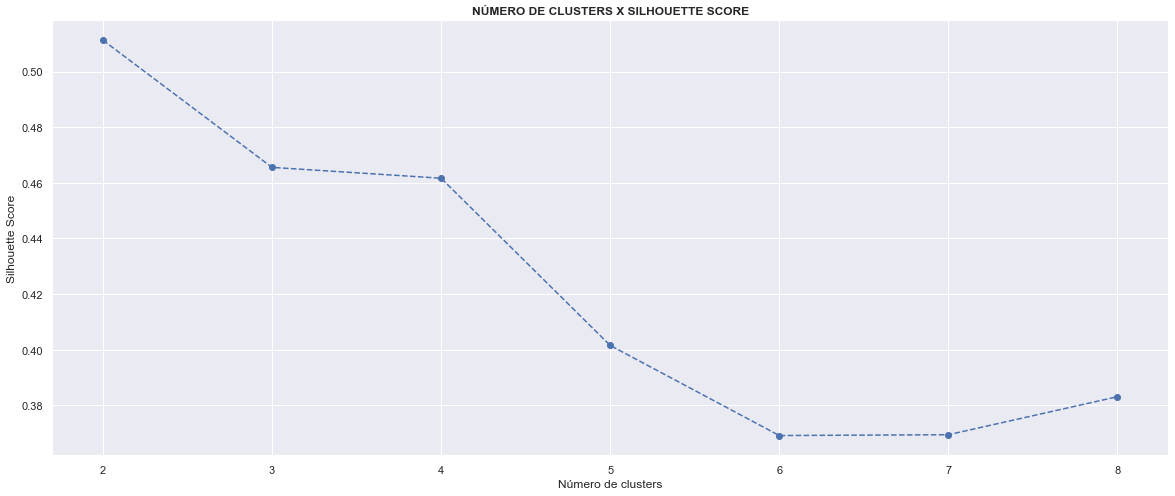

In [33]:
plt.figure(figsize=(20,8))
plt.plot(clusters, silhouette_list, linestyle='--', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('NÚMERO DE CLUSTERS X SILHOUETTE SCORE', fontweight='bold')

Text(0.5, 1.0, 'NÚMERO DE CLUSTERS X DB INDEX')

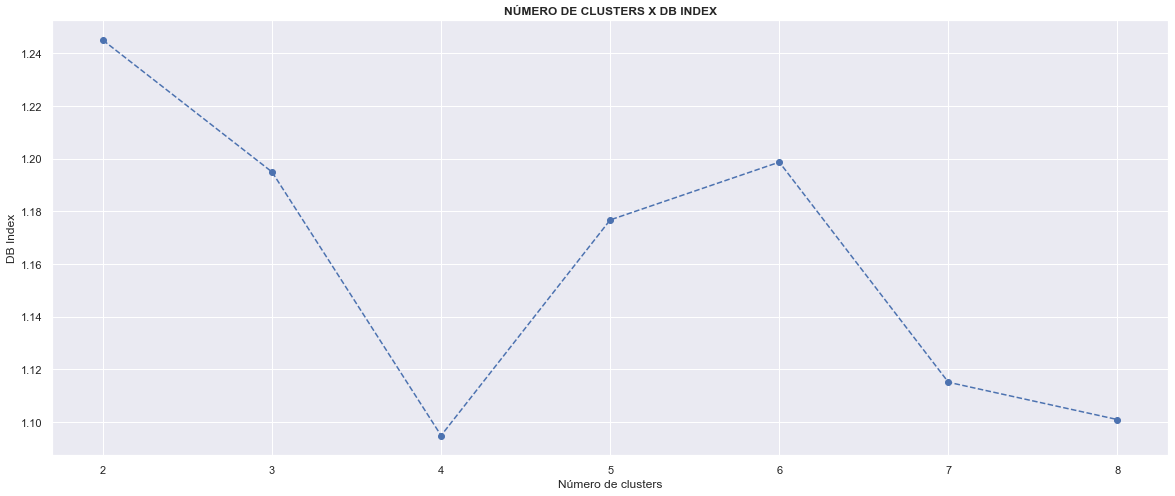

In [36]:
plt.figure(figsize=(20,8))
plt.plot(clusters, db_list, linestyle='--', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('DB Index')
plt.title('NÚMERO DE CLUSTERS X DB INDEX', fontweight='bold')

# 8.0 MACHINE LEARNING TRAINING

# 9.0 CLUSTERING ANALYSIS

# 10.0 EDA - INSIGHT REPORTS

# 11.0 DEPLOY TO PRODUCTION